# `NLTK` example

This notebook is an additional example to cover some (very) basic text-processing.

*Caveat*: I am not a natural languages person, so the analysis may make no academic sense! ;)

## Table of contents

1. [Using `nltk`](#using)
2. [Visualisation](#visualisation)
3. [`nltk` analysis example](#example)
4. [Making a function](#function)
5. [Other languages](#languages)

## Importing

* [http://www.nltk.org/](http://www.nltk.org/)

We import the `nltk` (natural languages toolkit) package with `import`, like the other Python packages we use in the SWC lesson

In [1]:
import nltk

<a id="using"></a>
## Using `nltk`

### Downloading example datasets

We almost immediately depart from the SWC lesson, because we need to deal with specific functions of `nltk` (as opposed to general programming principles). However, what we learned in the SWC lesson is still relevant, here.

We access functions in the `nltk` package with *dotted notation*, just like the functions we saw in `matplotlib`. The first function we'll use is one that downloads text corpora, so we have some examples to work with.

This function is `nltk.download()`, and we can pass it the name of a specific corpus, such as `gutenberg`.

Downloads may take a little time…

In [2]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/lpritc/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

## Working with corpus file lists

The corpus examples from `nltk` are accessed using *dotted notation* in the same way as in the lesson, like the `pyplot` package from `matplotlib` - `matplotlib.pyplot`. One important difference is that we need to use `nltk`-specific functions.

We can use the *dotted notation* to get a list of `nltk`'s example Gutenberg corpus datasets, with the `fileids()` function:

In [3]:
files = nltk.corpus.gutenberg.fileids()
print(files)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


This returns a *list*, which behaves in the same way as the other lists we saw in the lesson, so we can select individual files or slice the list as in the cells below:

In [4]:
# Use indexing to get the fourth item in the list
print(files[3])

bible-kjv.txt


In [5]:
# Use slicing to get the first three files in the list
print(files[:3])

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt']


We can also use a `for` loop to identify all the Chesterton texts:

In [6]:
# Get a list of texts by Chesterton
ch_files = []                        # empty list to hold filenames
for file in files:                   # look at each filename in turn
    if 'chesterton' in file:         # test if it's a Chesterton
        ch_files.append(file)         # add file to the list
print(ch_files)

['chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt']


## Working with file contents

We can identify and subset *list*s of files, but at some point we want to work with the text itself. The way that `nltk` does this is specific to the package, and so not suitable for the general SWC lesson, but we can use what we learned in SWC to carry out common tasks.

It is common in `nltk` to `import` a corpus directly - this helps reduce typing. For the Gutenberg corpus, this would be:

In [7]:
from nltk.corpus import gutenberg

Now we can refer to items in the `gutenberg` corpus with *dotted notation*, as below:

In [8]:
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


Each corpus also provides functions, again accessed by dotted notation, which can be used, for example to get data from or analyse each text.

So, to get all the words in Jane Austen's *Emma*, we can use the `gutenberg.words()` function:

In [9]:
gutenberg.words('austen-emma.txt')

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

This *looks like* a list, but isn't. We can use the `type()` function that we met in the SWC lesson to see what *datatype* it is:

In [10]:
emma_words = gutenberg.words('austen-emma.txt')
type(emma_words)

nltk.corpus.reader.util.StreamBackedCorpusView

This is a datatype that is specific to `nltk` (and so not in the scope of SWC), but we can do many of the things we would for lists, as in the cell below:

In [11]:
# How many tokens in the text:
print("Token count:", len(emma_words))

# What is the token at index 1000?
print("token at index 1000:", emma_words[1000])

# Slice from token 1400 to 1500
print("slice from 1400 to 1500:", emma_words[1400:1500])

Token count: 192427
token at index 1000: did
slice from 1400 to 1500: ['a', 'house', 'of', 'her', 'own', '?', 'This', 'is', 'three', 'times', 'as', 'large', '.--', 'And', 'you', 'have', 'never', 'any', 'odd', 'humours', ',', 'my', 'dear', '."', '"', 'How', 'often', 'we', 'shall', 'be', 'going', 'to', 'see', 'them', ',', 'and', 'they', 'coming', 'to', 'see', 'us', '!--', 'We', 'shall', 'be', 'always', 'meeting', '!', '_We_', 'must', 'begin', ';', 'we', 'must', 'go', 'and', 'pay', 'wedding', 'visit', 'very', 'soon', '."', '"', 'My', 'dear', ',', 'how', 'am', 'I', 'to', 'get', 'so', 'far', '?', 'Randalls', 'is', 'such', 'a', 'distance', '.', 'I', 'could', 'not', 'walk', 'half', 'so', 'far', '."', '"', 'No', ',', 'papa', ',', 'nobody', 'thought', 'of', 'your', 'walking', '.', 'We']


<a id="visualisation"></a>
## Visualisation

We can plot statistics relating to the text, using `matplotlib` and `seaborn`, as we did in the SWC lesson.

Firstly, we'll take the length of all tokens in the text and put that information in a list called `token_len` (and print the first few values):

In [12]:
token_len = []
for token in emma_words:
    token_len.append(len(token))
print("token_len:", token_len[:20])

token_len: [1, 4, 2, 4, 6, 4, 1, 6, 1, 7, 1, 4, 9, 1, 8, 1, 6, 1, 3, 4]


Next, we'll import modules for visualisation:

In [13]:
%matplotlib inline

import matplotlib.pyplot
import seaborn

Now we can plot summary statistics of the data - such as a distribution plot, to see what the most common token length is:

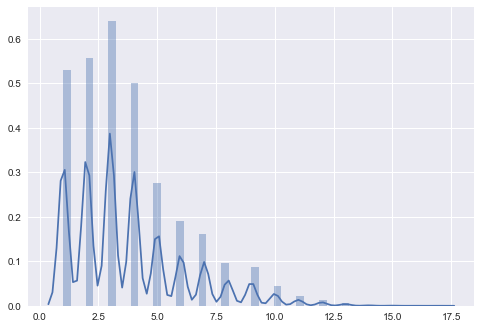

In [14]:
seaborn.distplot(token_len)

By using `for` loops, we can make comparisons over all texts in a corpus - here, text length:

(0, 1000000.0)

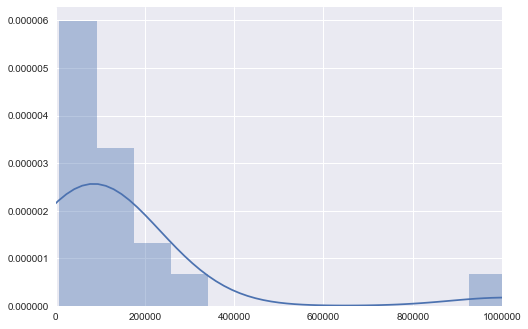

In [15]:
text_len = []
for text in gutenberg.fileids():
    text_len.append(len(gutenberg.words(text)))
seaborn.distplot(text_len)
seaborn.plt.xlim(0, 1e6)              # set x-axis limits

<a id="example"></a>
## An `nltk` analysis example

This sort of 'analysis' is rather simplistic, and `nltk` provides more meaningful analyses that are accessed through the `nltk` functions. These have particular syntax and expect a specific kind of input.

For example, `nltk` will calculate the conditional frequency distribution of target words, using the `class` (which we don't cover in SWC!) `nltk.ConditionalFreqDist`.

To see what it requires to work, we can use the `help()` function, as below - luckily, the `nltk` documentation is quite thorough, if a little technical:

In [16]:
#help(nltk.ConditionalFreqDist)

What `nltk.ConditionalFreqDist` needs is a list of `tuple`s (which we don't cover in SWC!).

Tuples are ordered *immutable* collections - a little like lists, except they cannot be modified once created. We make them in the same way as we make lists, except that we use parentheses instead of square brackets:

In [17]:
# list
my_list = [1, 2, 3]

# tuple
my_tuple = (1, 2, 3)

print("list:", my_list)
print("tuple:", my_tuple)

list: [1, 2, 3]
tuple: (1, 2, 3)


More specifically, what `nltk.ConditionalFreqDist` needs is a list of tuples where each tuple is of the form:

```python
(<word>, <text identifier>)
```

such as

```python
('Vogon', 'Adams')
```

or

```python
('Vogon', 'Sci-Fi')
```

The identifier is presumably going to depend on the focus of your study, and a list of these could look like:

```python
[('Vogon', 'Sci-Fi'), ('Orc', 'Fantasy'), ('Marlowe', 'Crime'), …]
```

Let's say we want to compare occurrences of `man` or `woman` (but not `men` or `women`) in the Gutenberg texts.

To get our list of tuples, we need to preprocess the data a little.

We're going to analyse all the texts in the Gutenberg corpus, so we loop over each text, and get the words with the `.words()` function:

```python
for text in gutenberg.fileids():
    words = gutenberg.words(text)
```

To buid this up for our analysis - for each text, we're going to filter for words that are in a list we define: `['man', 'woman']`. These words are lower-case, so we'll have to force the words from the text to lower-case, too.

We'll catch the words in a list called `filtered`, and we'll catch them as *tuple*s, of the form `(<word>, <fileid>)`:

```python
targets = ['man', 'woman']
filtered = []
for text in gutenberg.fileids():
    words = gutenberg.words(text)
    for word in words:
        word_lc = word.lower()              # word.lower() converts the word to lower case
        if word_lc in targets:
            filtered.append((word_lc, text))
```

In [18]:
targets = ['man', 'woman']
filtered = []
for text in gutenberg.fileids():
    words = gutenberg.words(text)
    for word in words:
        word_lc = word.lower()              # word.lower() converts the word to lower case
        if word_lc in targets:
            filtered.append((word_lc, text))

Let's look at our data:

In [19]:
print(filtered[:20])

[('woman', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('woman', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('woman', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('woman', 'austen-emma.txt'), ('woman', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('woman', 'austen-emma.txt'), ('man', 'austen-emma.txt')]


This looks to be correct, so we can use it as input to `nltk.ConditionalFreqDist` as below:

In [20]:
data = nltk.ConditionalFreqDist(filtered)
print(data)

<ConditionalFreqDist with 2 conditions>


This kind of object is unique to `nltk`, but we can access it using *square bracket notation* like other objects in Python.

For this kind of object, we put the word we're interested in into the square brackets, like:

```python
data['man']
```

In [21]:
# Get frequency count of a word
data['woman']

FreqDist({'austen-emma.txt': 131,
          'austen-persuasion.txt': 67,
          'austen-sense.txt': 68,
          'bible-kjv.txt': 364,
          'blake-poems.txt': 1,
          'bryant-stories.txt': 26,
          'carroll-alice.txt': 2,
          'chesterton-ball.txt': 19,
          'chesterton-brown.txt': 30,
          'chesterton-thursday.txt': 8,
          'edgeworth-parents.txt': 104,
          'melville-moby_dick.txt': 10,
          'milton-paradise.txt': 19,
          'shakespeare-caesar.txt': 5,
          'shakespeare-hamlet.txt': 7,
          'shakespeare-macbeth.txt': 10,
          'whitman-leaves.txt': 95})

The `nltk` developers have been kind, and provided a `plot()` function in that object which, like so much else in Python, we can access with *dotted notation* to get a graphical representation:

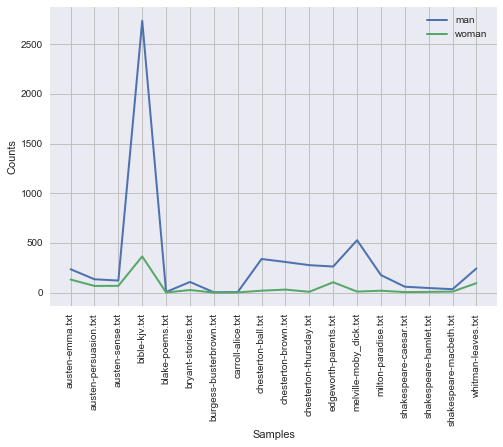

In [22]:
# Plot conditional frequency data
data.plot()

<a id="function"></a>
## Making this into a function

We can wrap this `nltk` analysis into a function, where we pass the target words we'd like to plot, and the function produces a graph, as above.

We'll call the function `plot_cfd()`, and have it take as its first argument a list of words. As a second optional argument, we can pass a corpus - but we'll make this default to `gutenberg`.

One subtlety here is that we want to match the case of words from the text, and the targets, so we convert all the target words to lower-case, too.

In [23]:
def plot_cfd(targets, corpus=gutenberg):
    """Plot conditional frequency graph of target words.
    
    Plots a conditional frequency graph of the target words in
    a corpus.
    
    - targets       a list of target words
    - corpus        the corpus module from nltk (optional)
                    default value: gutenberg
    """
    filtered = []
    targets_lc = []
    for target in targets:                    # make targets lower-case
        targets_lc.append(target.lower())
    for text in corpus.fileids():
        words = corpus.words(text)
        for word in words:
            word_lc = word.lower()
            if word_lc in targets_lc:
                filtered.append((word_lc, text))
    data = nltk.ConditionalFreqDist(filtered)
    data.plot()

Now we have the function, we can use it with arbitrary *list*s of target words, as below:

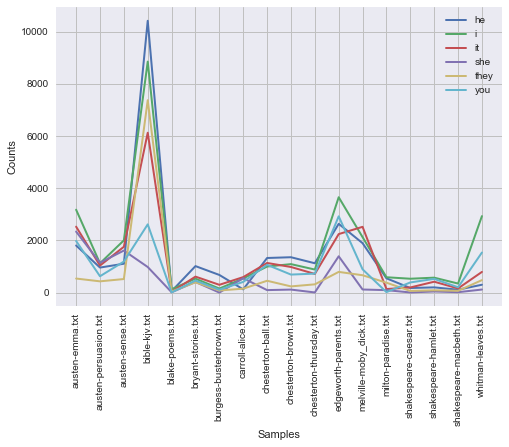

In [24]:
plot_cfd(['I', 'you', 'he', 'she', 'they', 'it'])

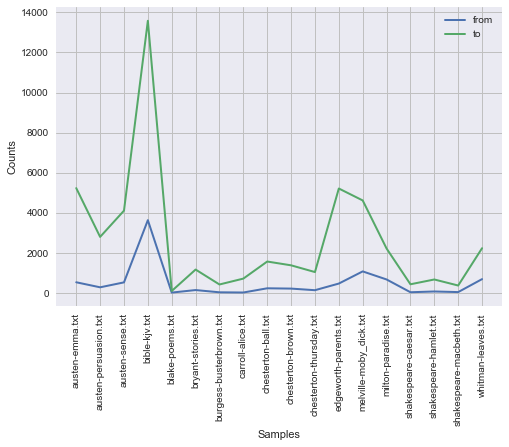

In [25]:
plot_cfd(['from', 'to'])

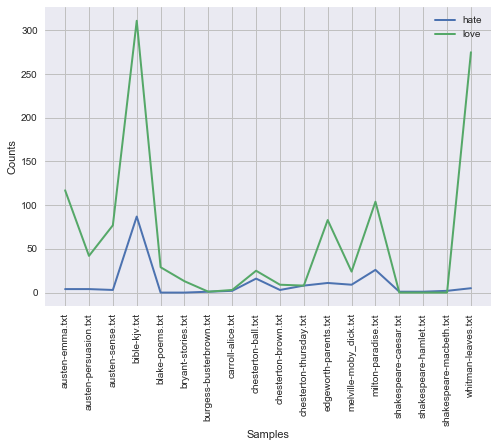

In [26]:
plot_cfd(['love', 'hate'])

<a id="languages"></a>
## Other languages

`nltk` provides corpora in other languages, and these need to be downloaded, e.g:

In [27]:
# Download Indian corpus
nltk.download('indian')

[nltk_data] Downloading package indian to /Users/lpritc/nltk_data...
[nltk_data]   Package indian is already up-to-date!


True

Unicode representation is native in Python3, and viewable in `Jupyter`:

In [28]:
# Import Indian corpus
from nltk.corpus import indian

# Show words from each text
for text in indian.fileids():
    print(text, indian.words(text)[:30])

bangla.pos ['মহিষের', 'সন্তান', ':', 'তোড়া', 'উপজাতি', '৷', 'বাসস্থান-ঘরগৃহস্থালি', 'তোড়া', 'ভাষায়', 'গ্রামকেও', 'বলে', '`', 'মোদ', "'", '৷', 'মোদের', 'আয়তন', 'খুব', 'বড়ো', 'নয়', '৷', 'প্রতি', 'মোদে', 'আছে', 'কিছু', 'কুঁড়েঘর', ',', 'সাধারণ', 'মহিষশালা', '৷']
hindi.pos ['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', 'राष्ट्र', '।', 'इराक', 'के', 'विदेश', 'मंत्री', 'ने', 'अमरीका', 'के', 'उस', 'प्रस्ताव', 'का', 'मजाक', 'उड़ाया', 'है', ',', 'जिसमें', 'अमरीका', 'ने', 'संयुक्त', 'राष्ट्र', 'के', 'प्रतिबंधों', 'को']
marathi.pos ["''", 'सनातनवाद्यांनी', 'व', 'प्रतिगाम्यांनी', 'समाज', 'रसातळाला', 'नेला', 'असताना', 'या', 'अंधारात', 'बाळशास्त्री', 'जांभेकर', 'यांनी', "'दर्पण'च्या", 'माध्यमातून', 'पहिली', 'ज्ञानज्योत', 'तेववली', ',', "''", 'असे', 'प्रतिपादन', 'नटसम्राट', 'प्रभाकर', 'पणशीकर', 'यांनी', 'केले', '.', 'दर्पणकार', 'बाळशास्त्री']
telugu.pos ['4', '.', 'ఆడిట్', 'నిర్వహణ', 'ఆడిటర్', 'ఒక', 'కొత్త', 'ఆడిట్', 'చేపట్టే', 'ముందు', 'సక్రమ', 'పద్ధతి', 'లో', 'కార్య', 'ప్రణాళికను', 'రూపొందించా